t-SNE done! Time elapsed: 1.1920928955078125e-06 seconds


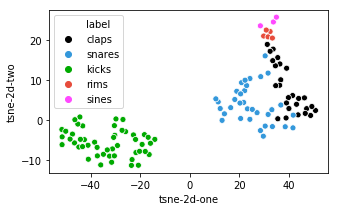

In [11]:
import numpy as np
import pandas as pd

import seaborn as sns
import scipy, matplotlib.pyplot as plt

from pathlib import Path

import loading as load
import feature_functions as ff

import imp
imp.reload(ff)

import scipy
import librosa
import madmom

a=load.loadAudioArrays()
kick_signals=a["kicks"]
snare_signals=a["snares"]
clap_signals=a["claps"]


def fitFreq(signals,t="unknown_drum",frameLen=1000,hopLen=4,num_feats=2):
    hopLen=frameLen-1
    def getFeat(x):
        fs=madmom.audio.signal.FramedSignal(x, sample_rate=48000,
            frame_size=frameLen,hop_size=hopLen)
        feat=np.zeros(frameLen)
        for frame in fs[0:4]:
            X=np.absolute(scipy.fft(frame))
            feat+=X
        return feat
    onsets=[]
    for s in signals:
        features=getFeat(s)
        onsets.append(features)
    df=pd.DataFrame(onsets)
    feat_cols=[ 'onset'+str(i) for i in range(df.shape[1])]
    df.columns=feat_cols
    df["label"]=t
    return df

df=pd.DataFrame()

for key,signals in a.items():
    # chunk=ff.fitPolyWave(signals)
    chunk=fitFreq(signals,t=key,num_feats=20)
    df=pd.concat([df,chunk])

df=df.fillna(0)
#find most useless features
#df.astype(bool).sum(axis=0).sort_values()

rndperm = np.random.permutation(df.shape[0])
#t-sne
ff.plotTSNE(df,perp=10)

(1025, 79)


Text(0.5,1,'Log-frequency power spectrogram')

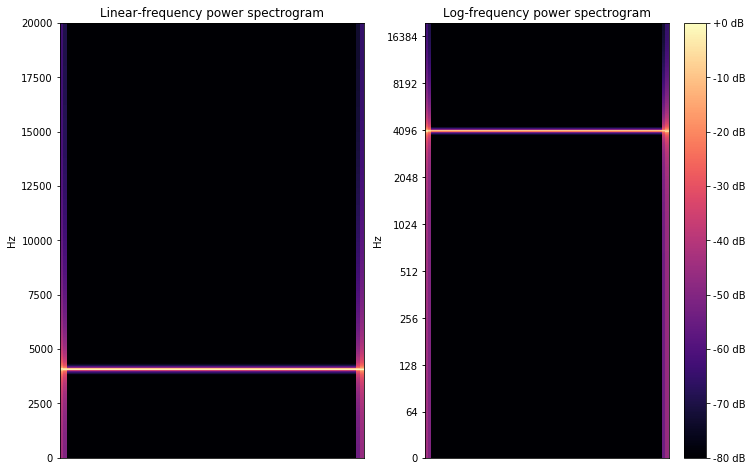

In [12]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

filename= "./samples/snares/snare_02.mp3"
y, sr = librosa.load(filename,sr=40000)
# Or generate 
tone = librosa.tone(4096, sr=40000, duration=1)
y=tone
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
print(D.shape)
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
librosa.display.specshow(D,sr=40000,y_axis='linear')
# plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
# Or on a logarithmic scale
plt.subplot(1, 2, 2)
librosa.display.specshow(D,sr=40000, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')